In [106]:
import os
import glob
import numpy as np
import filament
import datetime
import cmocean
import logging
import calendar
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

In [3]:
datafile = "/data/SST/Reynolds/sst.mnmean.nc"
os.path.exists(datafile)

True

In [44]:
# Domain of interest
lonmin, lonmax = -75., -5.
latmin, latmax = 0., 40.

In [45]:
with netCDF4.Dataset(datafile) as nc:
    sst = nc.variables['sst'][:]
    lon = nc.variables['lon'][:]
    lat = nc.variables['lat'][:]
    timevalues = nc.variables['time'][:]
    timeunits = nc.variables['time'].units
    dates = netCDF4.num2date(timevalues, timeunits)
    lon[lon > 180.] -= 360.

In [46]:
# Sub-setting
goodlon = np.where((lon >= lonmin) & (lon <= lonmax))[0]
goodlat = np.where((lat >= latmin) & (lat <= latmax))[0]
sst_area = sst[:, :, goodlon]
sst_area = sst_area[:, goodlat, :]

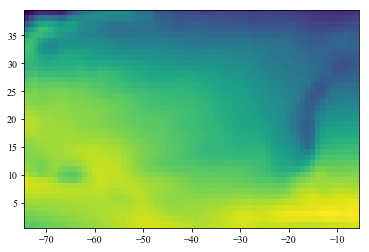

In [89]:
plt.pcolormesh(lon[goodlon], lat[goodlat], sst_area[-1,:,:])
plt.show()
plt.close()

In [118]:
# Compute the monthly mean
sst_mean = [sstmonth.mean() for sstmonth in sst_area]
sst_mean = np.array(sst_mean)

# Compute long-term monthly mean
sst_mean_month = np.array([np.mean(sst_mean[months == mm]) for mm in range(1, 13)])

# Compute standard deviation
sst_std_month = np.array([np.std(sst_mean[months == mm]) for mm in range(1, 13)])

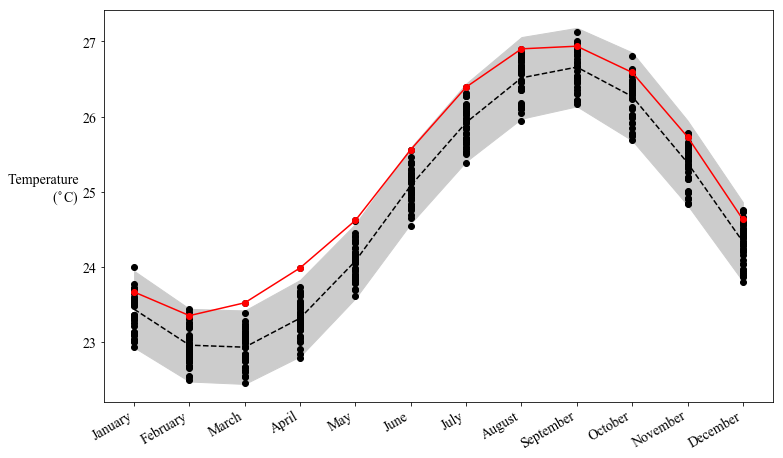

In [134]:
months = [dd.month for dd in dates]
years = [dd.year for dd in dates]

years = np.array(years)
months = np.array(months)
years2010 = np.where(years == 2010)[0]
years2009 = np.where(years == 2009)[0]

monthnum = np.arange(1, 13)

fig = plt.figure(figsize=(12, 8))
plt.plot(months, sst_mean, "ko")
plt.plot(monthnum, sst_mean_month, "--", color="k")
plt.fill_between(np.arange(1, 13), 
                 sst_mean_month - 2. * sst_std_month, 
                 sst_mean_month + 2. * sst_std_month,
                 color=".8")
#plt.plot(monthnum, sst_mean_month + 2. * sst_std_month, "--", color="0.6")
#plt.plot(monthnum, sst_mean_month - 2. * sst_std_month, "--", color="0.6")         
         
plt.plot(months[years2010], sst_mean[years2010], "ro-")
# plt.plot(months[years2009], sst_mean[years2009], "bo-")
plt.xticks(monthnum, calendar.month_name[1:])
plt.ylabel("Temperature\n($^{\circ}$C)", rotation=0, ha="right")
fig.autofmt_xdate()
plt.show()
plt.close()

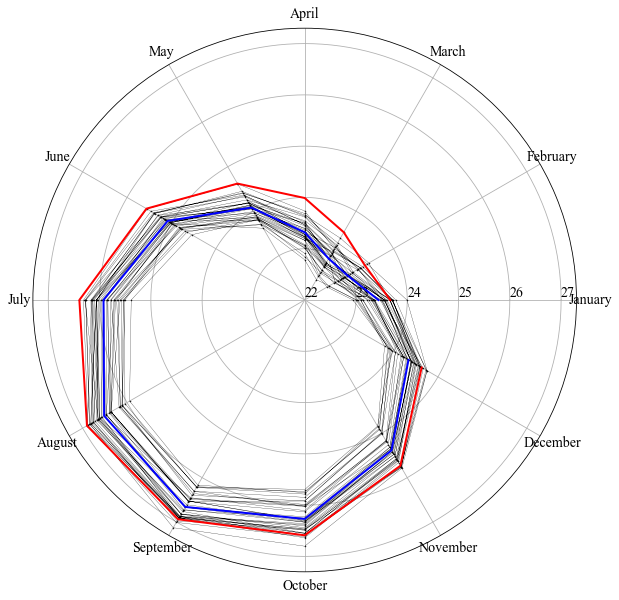

In [172]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')
month_angle = (months - 1) * np.pi / 6.
monthnum_angle = (monthnum - 1) * np.pi / 6.
plt.polar(month_angle, sst_mean, "ko-", linewidth=0.25, ms=.5)
plt.polar(monthnum_angle, sst_mean_month, "b", linewidth=2)
plt.polar(monthnum_angle, sst_mean[years2010], "r-", linewidth=2)
plt.ylim(22. ,27.3)
plt.thetagrids(range(0, 360, 30), calendar.month_name[1:] )
plt.rgrids(np.arange(22., 28.), angle=0)
#ax.yaxis.grid(False)
plt.show()
plt.close()